# IMPORTING THE REQUIRED LYBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import re
import nltk
from nltk.corpus import stopwords

# importing nltk and stopword
nltk.download('stopwords') #for stopword removal
nltk.download('wordnet') # Required for lemmatization
nltk.download('punkt')  #required for word tokenization

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
import string


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report,roc_curve

import pickle

import warnings
warnings.filterwarnings('ignore')





[nltk_data] Downloading package stopwords to C:\Users\Durgesh
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Durgesh
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Durgesh
[nltk_data]     Patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Loading The Data

In [2]:
train = pd.read_csv('train.csv')

# Basic Data Analysis

In [3]:
train.shape

(159571, 8)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#check for the null values
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

# Exploratory Data Analysis

In [8]:
labels=train.iloc[:, 2:8]  #labels with their corresponding values
labels

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [9]:
label_count=train.iloc[:, 2:8].sum()  #sum at rowwise
label_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [10]:
#lets see labels values
rowsums = train.iloc[:, 2:8].sum(axis=1) #sum at columnwise
rowsums

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

In [11]:
#now filter the comment with atleast one lable and without labels
nonlabels = 0
for i,value in rowsums.items():
    if value == 0:
        nonlabels += 1


print("Total number of comments: ",len(train))
print("Number of comment without labels: ", nonlabels)
print("Total number of comments with labels: ",rowsums.sum())  #or label_count.sum()

Total number of comments:  159571
Number of comment without labels:  143346
Total number of comments with labels:  35098


In [12]:
for col in ['toxic','severe_toxic','obscene','threat','insult','identity_hate']:
    print(f'------------------------{col}-----------------------')
    display(train.loc[train[col]==1,['comment_text',col]].sample(2))

------------------------toxic-----------------------


,comment_text,toxic
19649,lol \n\nDear SineBot\n\nF**CK you. In case you...,1
46458,!!!\nHave you heard about dynamic IPs? About p...,1


------------------------severe_toxic-----------------------


,comment_text,severe_toxic
99202,Fuck you bitch \n\nFuck you bitch,1
53057,FUCK USER JUJUBE!FUCK WIKIPEDIA!DESTROY USER J...,1


------------------------obscene-----------------------


,comment_text,obscene
143186,DAT CHICK \n\nOMG I DIDNT VANDALISE NUFFINK YH...,1
67765,You have got to be kidding \n\n(cur | prev) 1...,1


------------------------threat-----------------------


,comment_text,threat
129644,Die \n\nI HATE YOU PRICK YOU DINT DESERVE A PL...,1
65792,"Rape. \n\nNaconkantari is DEAD, or soon will b...",1


------------------------insult-----------------------


,comment_text,insult
3267,"Freeland, PA \n\nYou are really, really gay fo...",1
156913,You are a cunt \n\nDon't even think about bloc...,1


------------------------identity_hate-----------------------


,comment_text,identity_hate
46717,I will return in a few hours Canuck to wreak h...,1
148264,Y U REMUV MY POST AGANE \n\nEY YOU NIGGUR I SA...,1


# Data Visualization

In [13]:
classes=['toxic', 'severe_toxic', 'obscene', 'threat' ,'insult' , 'identity_hate']
print(classes)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


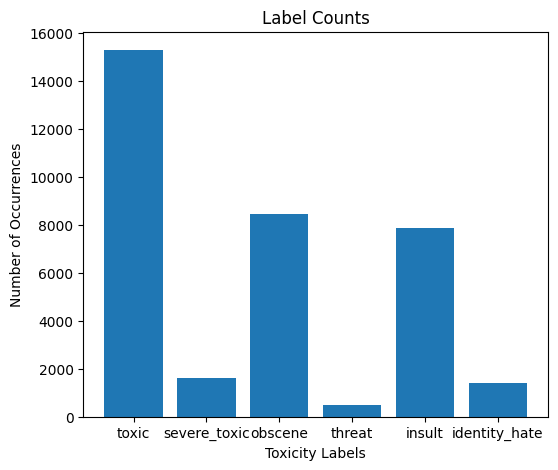

In [15]:
#let see the bar chart for each classes

# also counting the occurrences of each toxicity label
catg = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

# Create the bar chart
plt.figure(figsize=(6, 5))
plt.bar(catg.index, catg.values)
plt.xlabel("Toxicity Labels")
plt.ylabel("Number of Occurrences")
plt.title("Label Counts")
plt.show()


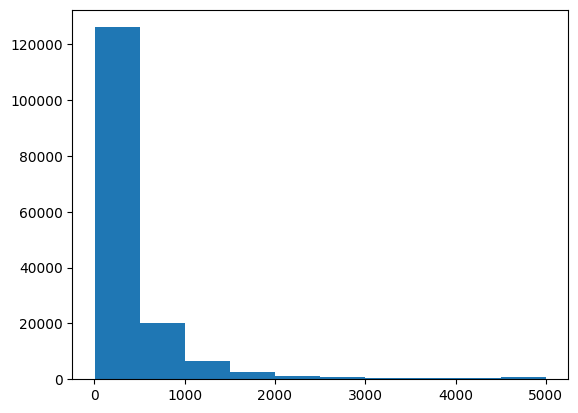

In [16]:
#length of th characters in train dataset
train['char_length'] = train['comment_text'].apply(lambda x: len(str(x)))
plt.figure()
plt.hist(train['char_length'])
plt.show()

train = train.drop('char_length',axis=1)


<Axes: title={'center': 'Correlation of features & targets'}>

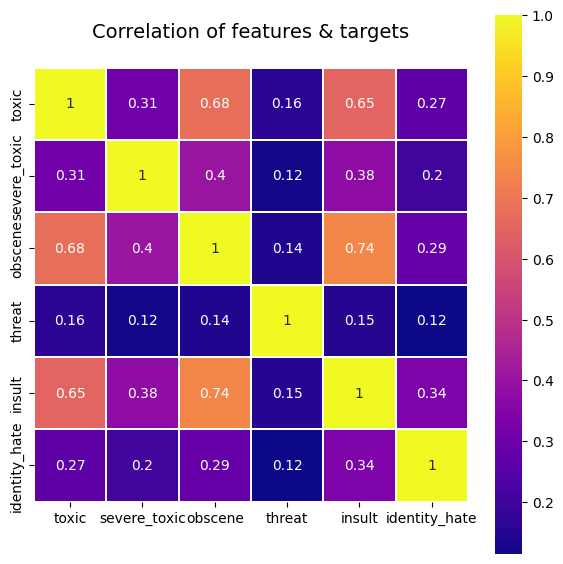

In [17]:
#Heatmap showing correlation between features nad labels
data=train[classes]
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

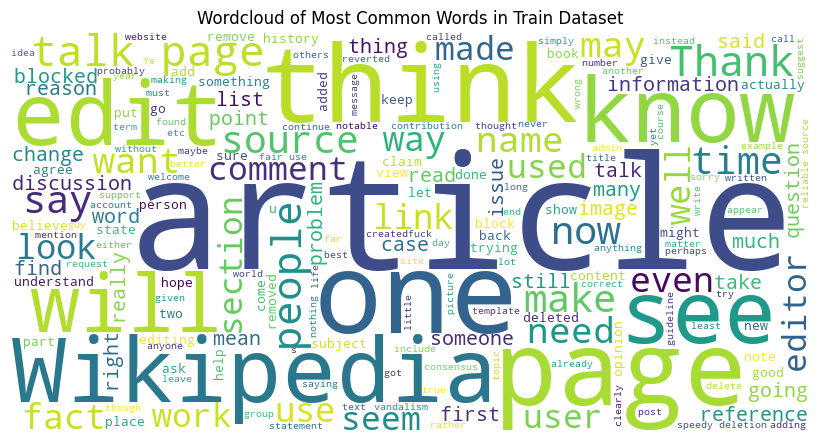

In [18]:
# wordcloud image of most common word present in tha train dataset


# Combine all text data into a single string
text = ' '.join(train['comment_text'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the generated image:
plt.figure(figsize=(8, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Wordcloud of Most Common Words in Train Dataset")
plt.show()

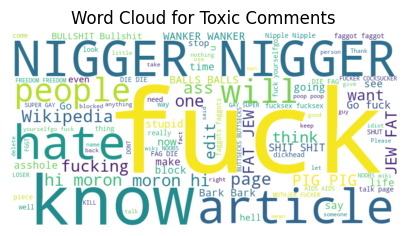

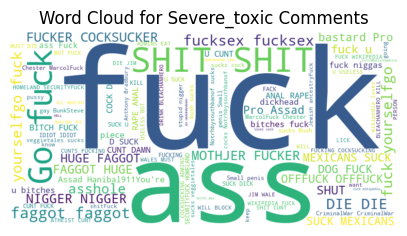

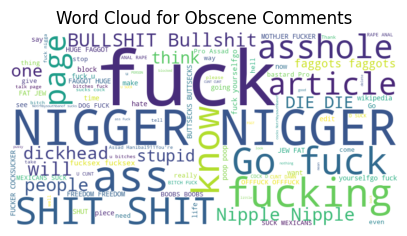

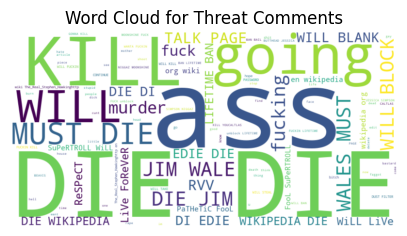

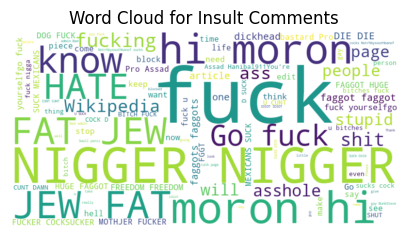

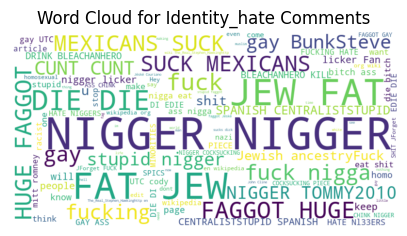

In [20]:
def plot_wordcloud(data, category_name):
    # Filter comments for the specific category
    category_comments = ' '.join(data[data[category_name] == 1]['comment_text'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(category_comments)
    
    # Plot word cloud
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category_name.capitalize()} Comments')
    plt.show()

# Plot word clouds for each category
for category in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    plot_wordcloud(train, category)

# Data Cleaning

In [21]:
train=train.drop(columns=["id"], axis= 1)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [23]:
#normal comment cleaning steps for train dataset

def clean(data, col):

    # Apply cleaning to the comment_text column
    data[col] = data[col].astype(str)  # Ensure the column is of string type
    data[col] = data[col].str.replace(r"http\S+", "")
    data[col] = data[col].str.replace(r"http", "")
    data[col] = data[col].str.replace(r"@\S+", "")
    data[col] = data[col].str.replace('https?://\S+|www\.\S+', ' social medium ')

    data[col] = data[col].str.lower()
    data[col] = data[col].str.replace("!", "i")
    data[col] = data[col].str.replace("|", "i")
    data[col] = data[col].str.replace("@", "a")
    data[col] = data[col].str.replace("$", "s")
    data[col] = data[col].str.replace("#ofc", " of fuckin course ")
    data[col] = data[col].str.replace("fggt", " faggot ")
    data[col] = data[col].str.replace("your", " your ")
    data[col] = data[col].str.replace("self", " self ")
    data[col] = data[col].str.replace("cuntbag", " cunt bag ")
    data[col] = data[col].str.replace("fartchina", " fart china ")
    data[col] = data[col].str.replace("youi", " you i ")
    data[col] = data[col].str.replace("cunti", " cunt i ")
    data[col] = data[col].str.replace("sucki", " suck i ")
    data[col] = data[col].str.replace("pagedelete", " page delete ")
    data[col] = data[col].str.replace("cuntsi", " cuntsi ")
    data[col] = data[col].str.replace("i'm", " i am ")
    data[col] = data[col].str.replace("offuck", " of fuck ")
    data[col] = data[col].str.replace("centraliststupid", " central ist stupid ")
    data[col] = data[col].str.replace("hitleri", " hitler i ")
    data[col] = data[col].str.replace("i've", " i have ")
    data[col] = data[col].str.replace("i'll", " sick ")
    data[col] = data[col].str.replace("fuck", " fuck ")
    data[col] = data[col].str.replace("f u c k", " fuck ")
    data[col] = data[col].str.replace("shit", " shit ")
    data[col] = data[col].str.replace("bunksteve", " bunk steve ")
    data[col] = data[col].str.replace('wikipedia', ' social medium ')
    data[col] = data[col].str.replace("faggot", " faggot ")
    data[col] = data[col].str.replace("delanoy", " delanoy ")
    data[col] = data[col].str.replace("jewish", " jewish ")
    data[col] = data[col].str.replace("sexsex", " sex ")
    data[col] = data[col].str.replace("allii", " all ii ")
    data[col] = data[col].str.replace("i'd", " i had ")
    data[col] = data[col].str.replace("'s", " is ")
    data[col] = data[col].str.replace("youbollocks", " you bollocks ")
    data[col] = data[col].str.replace("dick", " dick ")
    data[col] = data[col].str.replace("cuntsi", " cuntsi ")
    data[col] = data[col].str.replace("mothjer", " mother ")
    data[col] = data[col].str.replace("cuntfranks", " cunt ")
    data[col] = data[col].str.replace("ullmann", " jewish ")
    data[col] = data[col].str.replace("mr.", " mister ")
    data[col] = data[col].str.replace("aidsaids", " aids ")
    data[col] = data[col].str.replace("njgw", " nigger ")
    data[col] = data[col].str.replace("wiki", " social medium ")
    data[col] = data[col].str.replace("administrator", " admin ")
    data[col] = data[col].str.replace("gamaliel", " jewish ")
    data[col] = data[col].str.replace("rvv", " vanadalism ")
    data[col] = data[col].str.replace("admins", " admin ")
    data[col] = data[col].str.replace("pensnsnniensnsn", " penis ")
    data[col] = data[col].str.replace("pneis", " penis ")
    data[col] = data[col].str.replace("pennnis", " penis ")
    data[col] = data[col].str.replace("pov.", " point of view ")
    data[col] = data[col].str.replace("vandalising", " vandalism ")
    data[col] = data[col].str.replace("cock", " dick ")
    data[col] = data[col].str.replace("asshole", " asshole ")
    data[col] = data[col].str.replace("youi", " you ")
    data[col] = data[col].str.replace("afd", " all fucking day ")
    data[col] = data[col].str.replace("sockpuppets", " sockpuppetry ")
    data[col] = data[col].str.replace("iiprick", " iprick ")
    data[col] = data[col].str.replace("penisi", " penis ")
    data[col] = data[col].str.replace("warrior", " warrior ")
    data[col] = data[col].str.replace("loil", " laughing out insanely loud ")
    data[col] = data[col].str.replace("vandalise", " vanadalism ")
    data[col] = data[col].str.replace("helli", " helli ")
    data[col] = data[col].str.replace("lunchablesi", " lunchablesi ")
    data[col] = data[col].str.replace("special", " special ")
    data[col] = data[col].str.replace("ilol", " i lol ")

    data[col] = data[col].str.replace(r'\b[uU]\b', 'you')
    data[col] = data[col].str.replace(r"what's", "what is ")
    data[col] = data[col].str.replace(r"\'s", " is ")
    data[col] = data[col].str.replace(r"\'ve", " have ")
    data[col] = data[col].str.replace(r"can't", "cannot ")
    data[col] = data[col].str.replace(r"n't", " not ")
    data[col] = data[col].str.replace(r"i'm", "i am ")
    data[col] = data[col].str.replace(r"\'re", " are ")
    data[col] = data[col].str.replace(r"\'d", " would ")
    data[col] = data[col].str.replace(r"\'ll", " will ")
    data[col] = data[col].str.replace(r"\'scuse", " excuse ")


    data[col] = data[col].str.replace('\s+', ' ')  # will remove more than one whitespace character
    data[col] = data[col].str.replace("\n", " ") 
    data[col] = data[col].str.replace(r'(.)\1+', r'\1\1') # 2 or more characters are replaced by 2 characters

    # removing some spetial symbols
    data[col] = data[col].str.replace("[:|♣|'|§|♠|*|/|?|=|%|&|-|#|•|~|^|>|<|►|_]", '')


    return data[col] # return only the cleaned column


In [24]:
train['comment_text'] = clean(train, 'comment_text') #normal cleaning steps

In [25]:
#removing  punctuation
def remove_punctuation(text):
    
    return re.sub(r'[^\w\s]', '', text)


train['comment_text'] = train['comment_text'].apply(lambda x: remove_punctuation(x))

In [26]:
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,dawwi he matches this background colour i am ...,0,0,0,0,0,0
2,hey man i am really not trying to edit war i...,0,0,0,0,0,0
3,more i cannot make any real suggestions on i...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [27]:
#removing the stopwords
stop = set(stopwords.words('english'))
print(stop)
def remove_stopwords(text):

    words = [ w for w in text.split() if not w in stop]
    return ' '.join(words)

{"wasn't", 'your', 'himself', 'theirs', 'wouldn', 'was', 'did', 'which', 'both', 'then', 'our', 'its', 'into', 'them', 'few', 'other', 'too', "didn't", 'needn', "don't", "you've", 'am', 'these', 'if', 'shan', 'yourselves', 't', 'will', 'very', 'such', 'ain', 'before', "weren't", 'more', 're', 'being', 'were', 'yourself', 'same', 'm', 'over', "needn't", 'weren', 'up', 'again', 'don', "won't", "mustn't", 'no', 'is', 'under', 's', "hasn't", 'y', "couldn't", 'aren', 'now', 'i', 'his', "shouldn't", 'yours', "you'll", 'she', "she's", 'between', 'so', 'should', 'itself', 'once', 'nor', 'ours', 'we', 'an', "aren't", 'couldn', 'with', 'at', 'but', 'about', 'to', 'than', 'and', 'didn', 'themselves', 'some', "doesn't", 'you', 'above', 'be', 'he', 'their', 'd', 've', 'does', 'they', "hadn't", 'why', "isn't", 'the', 'do', 'for', 'had', 'mightn', 'are', 'here', 'a', 'by', 'haven', 'myself', 'of', 'while', 'doing', 'been', "you're", 'just', 'wasn', 'won', 'hasn', "should've", 'most', 'him', 'has', 'u

In [28]:
train['comment_text'] = train['comment_text'].apply(lambda x: remove_stopwords(x))  #stopword cleaning

In [29]:
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,dawwi matches background colour seemingly stuc...,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,cannot make real suggestions improvement wonde...,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0


In [30]:
#stemming  the data
stemmer = nltk.stem.SnowballStemmer('english')


#x=stemmer.stem("running")
#print(x)

def stem_text(text):
    if isinstance(text, str):
         words = text.split()
         stem_words = [stemmer.stem(word) for word in words]
         return ' '.join(stem_words)
    return text


In [31]:
train['comment_text'] = train['comment_text'].apply(lambda x: stem_text(x))    #stemming the text
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0
1,dawwi match background colour seem stuck thank...,0,0,0,0,0,0
2,hey man realli tri edit war guy constant remov...,0,0,0,0,0,0
3,cannot make real suggest improv wonder section...,0,0,0,0,0,0
4,sir hero chanc rememb page,0,0,0,0,0,0


# Splitting data into train/test

In [32]:
# the final text and the label
X = train['comment_text']
y = train[classes]
print(X)
print(y)

# Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

0         explan edit made usernam hardcor metallica fan...
1         dawwi match background colour seem stuck thank...
2         hey man realli tri edit war guy constant remov...
3         cannot make real suggest improv wonder section...
4                                sir hero chanc rememb page
                                ...                        
159566    second time ask view complet contradict covera...
159567     asham self horribl thing put talk page 128611993
159568    spitzer umm there actual articl prostitut ring...
159569    look like actual put speedi first version dele...
159570    realli think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object
        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0     

# Vectorize the data

In [33]:
# vectorization of the data using TF-IDF
tfidf = TfidfVectorizer(max_features=15000)
XTrain = tfidf.fit_transform(X_train)
XTest = tfidf.transform(X_test)

# Model training

# 1. Logistic Regression + OvsR

In [34]:
# Initializing the OneVsRest classifier with Logistic Regression
lr = OneVsRestClassifier(LogisticRegression(C=1, max_iter=1000))

# Training the model
lr.fit(XTrain, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1, max_iter=1000))

In [35]:
# Prediction on the test set for all labels
LRpred = lr.predict(XTest)
print(LRpred)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]]


# 2. Multinomial Naive Bayes Classifier

In [36]:
mnb = OneVsRestClassifier(MultinomialNB())

mnb.fit(XTrain,y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [37]:
# Prediction on the test set for all labels
MNBpred = mnb.predict(XTest)
print(MNBpred)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]]


# prediction

In [38]:
#Using LogisticRegression
comment= "stop it , or, i'll kill you."

clean=stem_text(remove_stopwords(remove_punctuation(comment)))

vec=tfidf.transform([clean])
classes=y.columns
result= lr.predict(vec)[0]


for catg, res in zip(classes, result):
    print("%14s %5s  " % (catg, res))

         toxic     1  
  severe_toxic     0  
       obscene     0  
        threat     1  
        insult     0  
 identity_hate     0  


In [39]:
#using multinomial naive bayes classifier
comment1 = "heyy nigga, come here"

vec1= tfidf.transform([comment1])
result1= mnb.predict(vec1)[0]


for catg, res in zip(classes, result1):
    print("%14s %5s  " % (catg, res))

         toxic     1  
  severe_toxic     0  
       obscene     1  
        threat     0  
        insult     1  
 identity_hate     0  


# Model Evaluation

In [40]:
lr_accuracy = accuracy_score(LRpred, y_test)
print("Accuracy of LR:",lr_accuracy)
mnb_accuracy = accuracy_score(MNBpred, y_test)
print("Accuracy of MNB: ",mnb_accuracy)


Accuracy of LR: 0.9184082719724268
Accuracy of MNB:  0.9096349678834403


In [41]:
print("Classification Report(LR):\n\n",classification_report(y_test,LRpred))

Classification Report(LR):

               precision    recall  f1-score   support

           0       0.91      0.61      0.73      3056
           1       0.58      0.25      0.35       321
           2       0.91      0.65      0.76      1715
           3       0.56      0.12      0.20        74
           4       0.81      0.52      0.63      1614
           5       0.67      0.16      0.25       294

   micro avg       0.87      0.56      0.68      7074
   macro avg       0.74      0.39      0.49      7074
weighted avg       0.86      0.56      0.67      7074
 samples avg       0.06      0.05      0.05      7074



In [42]:
print("Classification Report(MNB):\n\n",classification_report(y_test,MNBpred))

Classification Report(MNB):

               precision    recall  f1-score   support

           0       0.93      0.47      0.63      3056
           1       0.65      0.05      0.10       321
           2       0.91      0.44      0.60      1715
           3       0.00      0.00      0.00        74
           4       0.82      0.37      0.51      1614
           5       0.50      0.00      0.01       294

   micro avg       0.90      0.40      0.55      7074
   macro avg       0.64      0.22      0.31      7074
weighted avg       0.86      0.40      0.54      7074
 samples avg       0.04      0.03      0.03      7074



# To Run on streamlit app

In [43]:
pickle.dump(tfidf , open('vec.pkl', 'wb'))
pickle.dump( lr, open('mod.pkl', 'wb'))
